Predicting the category of footwear (Boots, Sandals, or Slippers) using Convolutional Neural Networks (CNN) involves training a model that can differentiate between the unique features of each type of footwear. Here's a general outline of the steps involved in building such a model:

Data Collection: Collect a dataset of images containing Boots, Sandals, and Slippers. It's important to ensure that the images are of good quality and that each class has a balanced number of images.

Data Preprocessing: Preprocess the images by resizing them to a fixed size, converting them to grayscale or RGB format, and normalizing the pixel values.

Model Architecture: Design a CNN architecture that consists of several convolutional layers, max-pooling layers, and fully connected layers. The exact architecture will depend on the complexity of the dataset and the size of the images.

Model Training: Train the CNN model using the preprocessed images. Use a loss function like categorical cross-entropy, and optimize the model using stochastic gradient descent or a similar algorithm. The number of epochs and batch size should be chosen based on the size of the dataset and the available computational resources.

Model Evaluation: Evaluate the performance of the model on a separate test set using metrics like accuracy, precision, recall, and F1-score.

Prediction: Use the trained model to predict the category of new images of footwear.

Overall, building a CNN model for predicting the category of footwear involves a combination of data preprocessing, model architecture design, training, evaluation, and prediction.






Running on public URL: https://d9ff2250e2ec6f62e3.gradio.live

#Import the necessary packages

In [101]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.12.0


In [102]:
model = Sequential()
model.add(Conv2D(20, (5, 5), padding="same",input_shape=(24,24,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
# softmax classifier
model.add(Dense(3))
model.add(Activation("softmax"))

In [103]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 20)        1520      
                                                                 
 activation_13 (Activation)  (None, 24, 24, 20)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 20)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2880)              0         
                                                                 
 dense_12 (Dense)            (None, 500)               1440500   
                                                                 
 activation_14 (Activation)  (None, 500)               0         
                                                      

# Create CNN Model

In [104]:

class LeNet:

    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, h, chanel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


In [157]:
DATASET = "/content/drive/MyDrive/Deep Learning Exam/CNN/train"  # this folde must contain three subfolder with images
MODEL = "Scene.model" # name to store the model on disk
PLOT = "plot.png" # plot name

In [158]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
import os
os.chdir("/content/drive/MyDrive/Deep Learning Exam/CNN")

In [161]:
!dir

test  train  Untitled0.ipynb


# Initialize the data and labels

In [162]:

print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed(42)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Boots":
            label = 0
        elif label == "Sandals":
            label = 1
        elif label == "Slippers":
            label = 2

        labels.append(label)
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


100%|██████████| 778/778 [00:49<00:00, 15.62it/s]


In [163]:
data[0].shape

(28, 28, 3)

In [164]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [165]:
labels

array([1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2,

In [166]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [167]:
trainX.shape

(583, 28, 28, 3)

In [168]:
trainY.shape

(583,)

In [169]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [170]:
trainY[0]

array([1., 0., 0.], dtype=float32)

# Construct the image generator for data augmentation

In [171]:

aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2, 
                         horizontal_flip=True, 
                         fill_mode="nearest")

# Initialize the model

In [172]:

print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3)


opt = Adam(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model complied...")
EPOCHS = 50
INIT_LR = 1e-3
BS = 32

[INFO] compiling model...
[INFO] model complied...


In [173]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 20)        1520      
                                                                 
 activation_26 (Activation)  (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 50)        25050     
                                                                 
 activation_27 (Activation)  (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 50)         0         
 g2D)                                                 

In [174]:
tf.config.experimental_run_functions_eagerly(True)

# Train the network

In [175]:

print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // BS,
              epochs=50, 
              verbose=1)

[INFO] training network...
Epoch 1/50
18/18 [==============================] - 3s 191ms/step - loss: 0.9771 - accuracy: 0.5064 - val_loss: 0.9838 - val_accuracy: 0.4718
Epoch 2/50
18/18 [==============================] - 3s 188ms/step - loss: 0.7900 - accuracy: 0.6461 - val_loss: 0.5706 - val_accuracy: 0.7128
Epoch 3/50
18/18 [==============================] - 5s 269ms/step - loss: 0.6233 - accuracy: 0.7114 - val_loss: 0.4524 - val_accuracy: 0.8256
Epoch 4/50
18/18 [==============================] - 3s 190ms/step - loss: 0.6447 - accuracy: 0.7241 - val_loss: 0.4553 - val_accuracy: 0.7846
Epoch 5/50
18/18 [==============================] - 3s 187ms/step - loss: 0.5324 - accuracy: 0.7768 - val_loss: 0.4700 - val_accuracy: 0.8308
Epoch 6/50
18/18 [==============================] - 4s 215ms/step - loss: 0.5321 - accuracy: 0.7804 - val_loss: 0.3517 - val_accuracy: 0.8615
Epoch 7/50
18/18 [==============================] - 5s 259ms/step - loss: 0.4983 - accuracy: 0.7804 - val_loss: 0.4708 - 

#Plot the training and validation accuracy

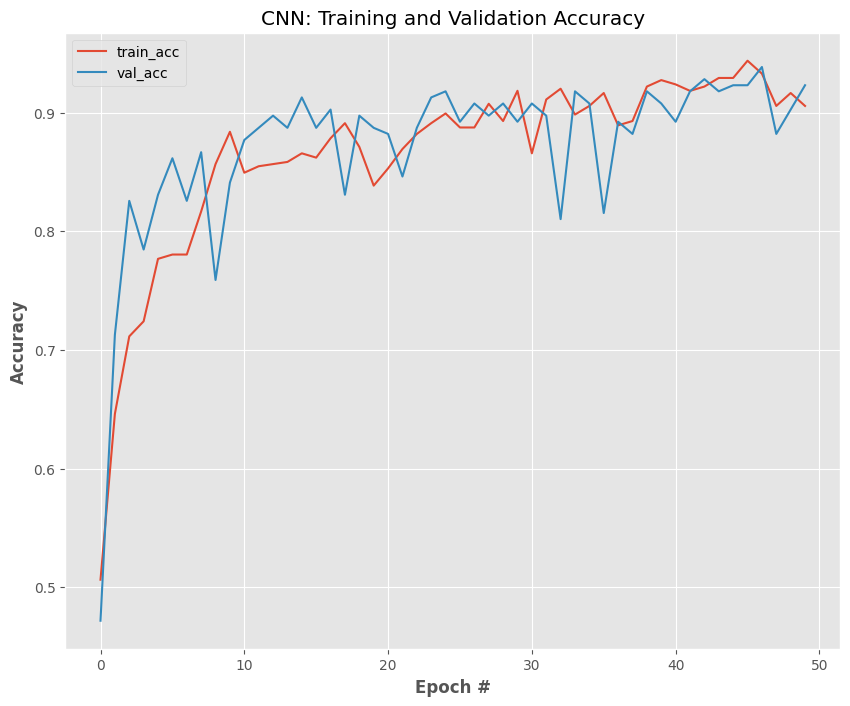

In [176]:

N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

# Plot the training and validation loss

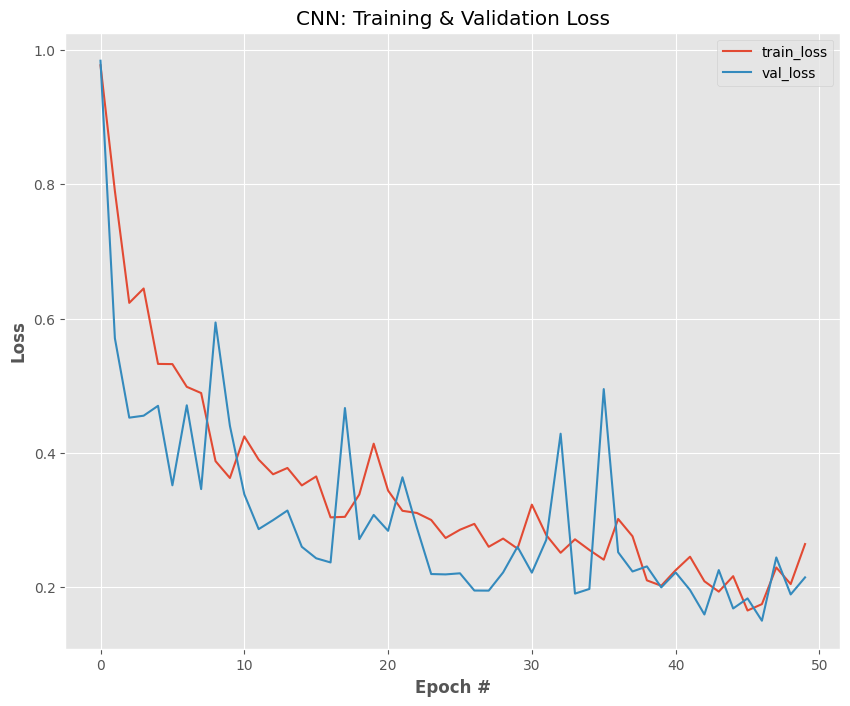

In [177]:

N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [178]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from imutils import paths
%matplotlib inline

In [179]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    #plt.grid(b=None)
    ax = fig.add_subplot(111)

    ax.imshow(img)

In [180]:
!dir


test  train  Untitled0.ipynb


In [181]:
from tqdm import tqdm

# Evaluate the model on a test set

In [182]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 2 categorical folders

all_class = ["Boots", "Sandals", "Slippers"]


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf= model.predict(image)[0] # [[0.1 , 0.8 , 0.1]]
        print(prd_conf)

        # build the label
        label = all_class[np.argmax(prd_conf)] #[b f s]-> f
        proba = prd_conf[np.argmax(prd_conf)] # [0.1 , 0.8 , 0.1]  -> 0.8

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.

Gradio is a Python library that allows you to quickly create and share custom interfaces for your machine learning models. With Gradio, you can build a simple user interface for your model without having to write any HTML, CSS, or JavaScript. You can also easily deploy your Gradio interface to the web, making it accessible to anyone with an internet connection.

In [183]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 

In [184]:
import gradio as gr

In [185]:
def predict_image(image):
    # load the image
    
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

        
    preds = model.predict(image)[0]
    result = dict()
    result["Boots"] = round(float(list(preds)[0]), 3)
    result["Sandals"] = round(float(list(preds)[1]), 3)
    result["Slippers"] = round(float(list(preds)[2]), 3)
    
    print(result)
    
    return result

In [186]:
im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="CNN Exam").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d9ff2250e2ec6f62e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
